In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Get data

In [2]:
from google.colab import files
uplaoded= files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
iris= pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Explore and visuilization

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.groupby('species')['sepal_length','sepal_width'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sepal_length                        ... sepal_width                 
                       count   mean       std  min  ...         25%  50%    75%  max
species                                             ...                             
Iris-setosa             50.0  5.006  0.352490  4.3  ...       3.125  3.4  3.675  4.4
Iris-versicolor         50.0  5.936  0.516171  4.9  ...       2.525  2.8  3.000  3.4
Iris-virginica          50.0  6.588  0.635880  4.9  ...       2.800  3.0  3.175  3.8

[3 rows x 16 columns]

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

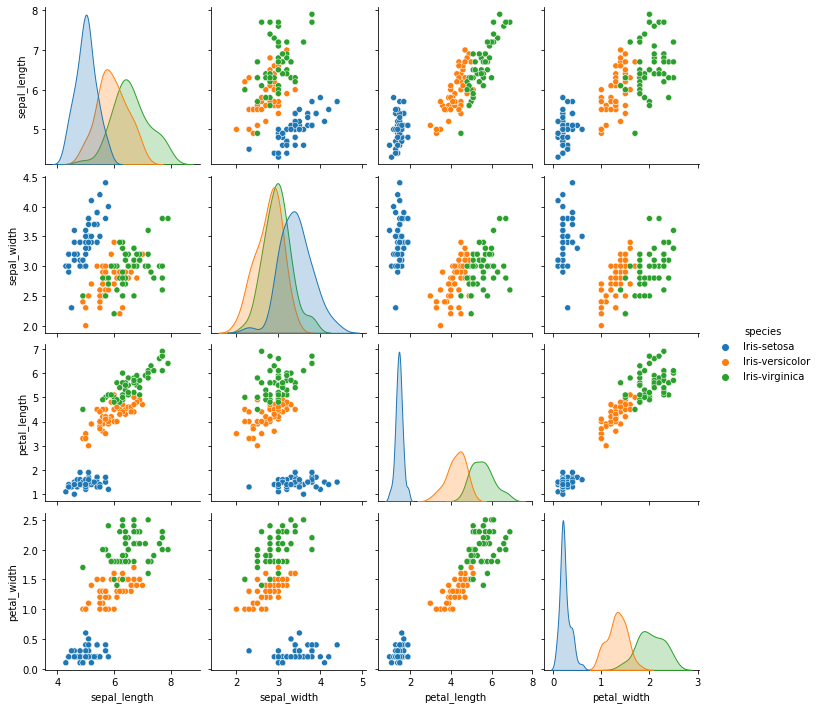

In [6]:
sns.pairplot(iris,hue='species')

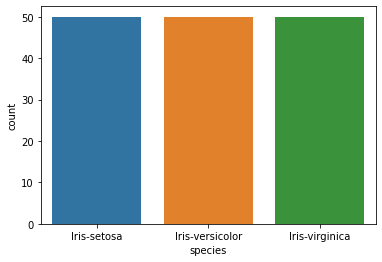

In [ ]:
sns.countplot(data=iris,x='species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1e1913f10>,
      dtype=object)

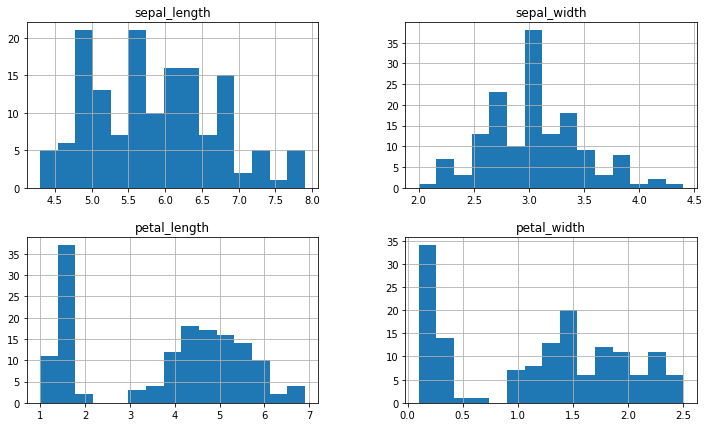

In [9]:

iris.hist(bins=15,figsize=(12,7))

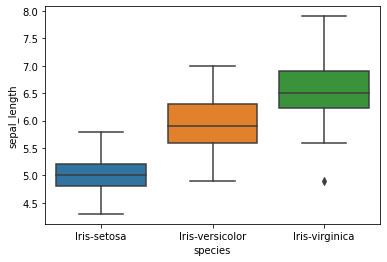

In [ ]:
sns.boxplot(data=iris,x='species',y='sepal_length')

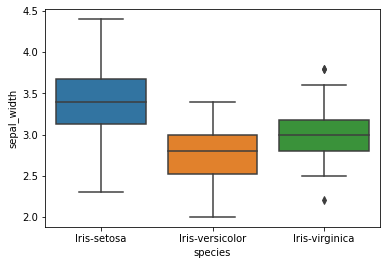

In [ ]:
sns.boxplot(data=iris,x='species',y='sepal_width')

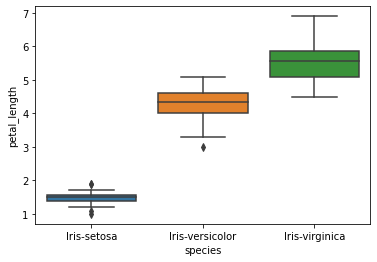

In [ ]:
sns.boxplot(data=iris,x='species',y='petal_length')

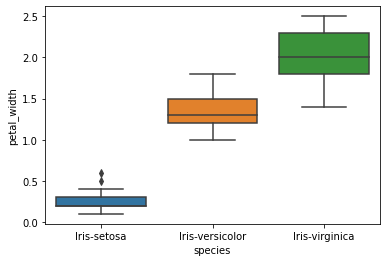

In [ ]:
sns.boxplot(data=iris,x='species',y='petal_width')

# split the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop('species',axis=1), 
                                                    iris['species'], test_size=0.30, 
                                                    random_state=101)

# KNeighborsClassifier

In [14]:
from sklearn.metrics import classification_report

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



# Measuring Accuracy Using Cross-validation

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scores=cross_val_score(knn,x_train,y_train,cv=3,scoring="f1_macro")
scores.mean()

0.9197103765407849

In [19]:
scores=cross_val_score(tree,x_train,y_train,cv=3,scoring="f1_macro")
scores.mean()

0.9305302856027494

#RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
scores=cross_val_score(forest_clf,x_train,y_train,cv=3,scoring="f1_macro")
scores.mean()


0.9305302856027494

# Support vector machine

In [21]:
from sklearn.svm import SVC
svc=SVC()
scores=cross_val_score(svc,x_train,y_train,cv=3,scoring="f1_macro")
scores.mean()


0.9703787007880574

# Naive_bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
scores=cross_val_score(GaussianNB(),x_train,y_train,cv=3,scoring="f1_macro")
scores.mean()


0.9513162817256383

THE BEST MODEL IS SVC

# the testset with the svm model

In [23]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



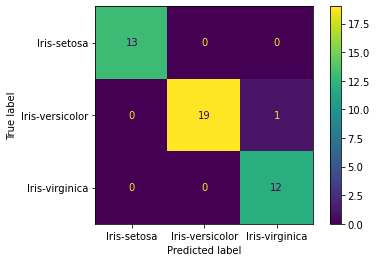

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test)
plt.show()

In [ ]:
That great the accuracy is 98%